<a href="https://colab.research.google.com/github/Xiaowei0402/CS229_final_project/blob/main/CS229_FP_training_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# helper function for plotting

In [ ]:
def scatter_plot_pred(y_test, y_pred, colorbar = False):
  sortind = np.argsort(y_test)
  plt.scatter(np.asarray(y_test)[sortind],y_pred[sortind],c = np.arange(len(y_test)))
  plt.plot(np.linspace(np.min(y_test), np.max(y_test),100),np.linspace(np.min(y_test), np.max(y_test),100),'r--')
  plt.xlabel('Observed y')
  plt.ylabel('Predicted y')
  if colorbar == True:
    plt.colorbar()

# Import datast

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import sklearn
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/CS229_Final_Project')

In [ ]:
# Load information of target strand
filename = 'merged_B2_mNG.csv'
df_input = pd.read_csv(filename)

# Split into train and test dataset (60/20/20)

Don't need to run this again once we have the split

In [ ]:
# permute indicies
permuted = np.random.permutation(len(df_input))

df_train = df_input.loc[list(permuted[0:round(len(df_input)*0.7)])]
# df_valid = df_input.loc[list(permuted[round(len(df_input)*0.6):round(len(df_input)*0.8)])]
df_test = df_input.loc[list(permuted[round(len(df_input)*0.7):])]

In [ ]:
# save train and test set
# df_train.to_csv('train_'+filename+'.csv')
# df_test.to_csv('test_'+filename+'.csv')

# Formatting x into matrix and y into vector

In [ ]:
def format_input(df, intercept = False, dropcolumns = ['Unnamed: 0','Unnamed: 0.1', 'comp_seq_ind','A_pos','y','delta_y']):
  # for x, drop first 3 columns, and y
  df_x = df.drop(columns=dropcolumns)
  x = df_x.to_numpy()

  y = list(df['y'])

  return x,y

## getting x-matirx and y, igoring distance to 5 and distance to 3:


In [ ]:
# x_train, y_train = format_input(df_train, dropcolumns = ['Unnamed: 0', 'comp_seq_ind','A_pos', 'distance_to_5', 'distance_to_3','y','delta_y'])
# x_test, y_test = format_input(df_test, dropcolumns = ['Unnamed: 0', 'comp_seq_ind','A_pos', 'distance_to_5', 'distance_to_3','y','delta_y'])

x_train, y_train = format_input(df_train)
# x_valid, y_valid = format_input(df_valid)
x_test, y_test = format_input(df_test)

In [ ]:
# normalize data to unit variance
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
# X_valid = scaler.transform(x_valid)

scaler = StandardScaler()
scaler.fit(x_test)
X_test = scaler.transform(x_test)

# y_train = (y_train - np.mean(y_train))/np.var(y_train)
# y_test = (y_test - np.mean(y_test))/np.var(y_test)

# Training: XGBoost


In [ ]:
# search for best parameters

regressor=xgb.XGBRegressor(eval_metric='rmse', seed = 229)

from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3,4,5, 6],
              "n_estimators": [200, 500, 800, 1000,1200],
              "learning_rate": [0.01, 0.02]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

In [ ]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.669776,0.107028,0.021799,0.001204,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.500813,0.494936,0.495003,0.490533,0.485807,0.493418,0.005015,40
1,2.212874,2.057363,0.056483,0.021698,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.637830,0.636383,0.632631,0.638527,0.626482,0.634371,0.004440,37
2,2.886965,2.200234,0.073315,0.002238,0.01,3,800,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.674515,0.680876,0.679707,0.683291,0.675357,0.678749,0.003332,35
3,3.159904,1.988962,0.105890,0.025295,0.01,3,1000,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.693540,0.699733,0.701149,0.700531,0.695514,0.698093,0.003012,33
4,3.548720,1.992547,0.132192,0.028868,0.01,3,1200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.708607,0.714677,0.717675,0.716813,0.711421,0.713839,0.003391,30
5,0.730811,0.020524,0.029201,0.004155,0.01,4,200,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.592603,0.587314,0.581289,0.588593,0.579622,0.585884,0.004793,39
6,2.503451,2.052451,0.068003,0.008030,0.01,4,500,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.712633,0.707659,0.715015,0.705017,0.702268,0.708518,0.004716,31
7,3.250111,2.096104,0.101051,0.003163,0.01,4,800,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.754064,0.757539,0.758575,0.747903,0.750999,0.753816,0.003987,27
8,4.826144,2.431239,0.156169,0.048634,0.01,4,1000,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.777520,0.779019,0.780543,0.771919,0.773694,0.776539,0.003243,23
9,4.233606,2.146403,0.204611,0.092059,0.01,4,1200,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.794015,0.795022,0.799595,0.789650,0.795407,0.794738,0.003179,20


In [ ]:
regressor=xgb.XGBRegressor(learning_rate = 0.02,
                           n_estimators  = 800,
                           max_depth     = 6,
                           eval_metric='rmse')

regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = regressor.predict(X_test)

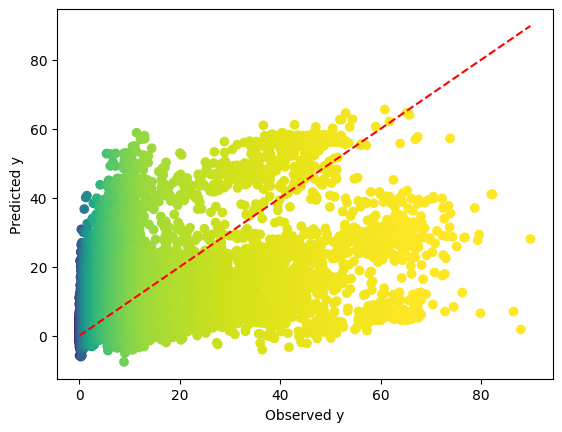

In [ ]:
scatter_plot_pred(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE_train = mean_squared_error(y_train, regressor.predict(X_train))
accuracy_train = r2_score(y_train, regressor.predict(X_train))
print('MSE for training set:', MSE_train)
print('Accuracy for training set:', accuracy_train)

MSE for training set: 12.80443824006961
Accuracy for training set: 0.9211165606180066


In [ ]:
MSE_test = mean_squared_error(y_test, y_pred)
accuracy_test = r2_score(y_test, y_pred)
print('MSE for test set:', MSE_test)
print('Accuracy for test set:', accuracy_test)

MSE for test set: 115.41844116921166
Accuracy for test set: 0.3009341578408803


## get most indicative features

In [ ]:
from sklearn.inspection import permutation_importance

fn=['distance_to_5', 'distance_to_3','global_GC_content','local_GC_content_21','bulge-T', 'bulge-TTC','bulge-TTCTT','bulge-TTCTTCT','bulgesite',
              'mismatch_site_num', 'mismatch_num','mismatch_site_1','G_penalty_1','mismatch_site_2','G_penalty_2', 'editing_site_mismatch','is_toC','is_toG','is_out_of_ds']

def get_indicative_features(model, X, y, features):
  result = permutation_importance(
    model, X, y, n_repeats=10, random_state=229
  )

  fn_importance = pd.Series(result.importances_mean, index=features)

  fig, ax = plt.subplots()
  fn_importance.plot.bar(yerr=result.importances_std, ax=ax)
  ax.set_title("Feature importances using permutation on full model")
  ax.set_ylabel("Mean accuracy decrease")
  fig.tight_layout()

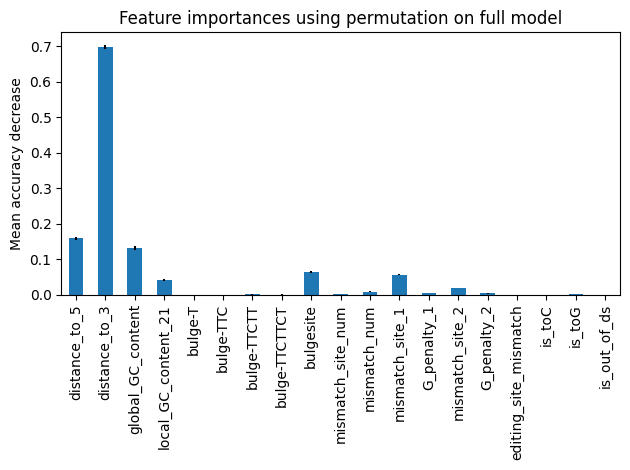

In [ ]:
# use permutation importance to avoid high cardinality feature problem
# global analysis


get_indicative_features(regressor, X_test, y_test, fn)
